In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import rasterio as rio
import matplotlib.pyplot as plt
from PIL import Image
import scipy.misc

import os

In [8]:
tf.__version__


'2.4.1'

In [36]:
# cd into project directory
proj_path = '/home/jose/Documents/Thesis/modeling/tensorflow/fifth_try/workspace'   # ---------------> Define path please!!!
os.chdir(proj_path)
train_dir = proj_path + '/training'
test_dir = proj_path + '/testing'

# loading in dir paths for training and testing folders within project
folders_in = os.listdir()

training_mine_dir = train_dir + '/' + 'mine_img'    # dir training class = 1
training_notmine_dir = train_dir + '/' + 'not_mine_img'   # dir training class = 0

testing_mine_dir = test_dir + '/' + 'mine_img'      # dir testing class = 1
testing_notmine_dir = test_dir + '/' + 'not_mine_img'     # dir testing class = 0


# checking if final paths actually exist
if not os.path.isdir(training_mine_dir):
    print(training_mine_dir,'   --------- > is not a directory!!!')
    
elif not os.path.isdir(training_notmine_dir):
    print(training_notmine_dir,'   --------- > is not a directory!!!')

elif not os.path.isdir(testing_mine_dir):
    print(testing_mine_dir,'   --------- > is not a directory!!!')

elif not os.path.isdir(testing_notmine_dir):
    print(testing_notmine_dir,'   --------- > is not a directory!!!')
    
    
    

FileNotFoundError: [Errno 2] No such file or directory: '/home/jose/Documents/Thesis/modeling/tensorflow/fifth_try/workspace'

In [130]:
# defining training and testing ImageDataGenerators
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator( horizontal_flip=True,
                                    vertical_flip=True,
                                    rotation_range=10
                                                       )

test_datagen = ImageDataGenerator( horizontal_flip=True,
                                   vertical_flip=True,
                                   rotation_range=10
                                                       )


# defining training and testing generators from ImageDataGenerator objects
train_generator = train_datagen.flow_from_directory( train_dir,
                                                     batch_size = 4,
                                                     class_mode = 'binary',
                                                     #color_mode = 'grayscale',
                                                     target_size = (50,50), 
                                                                           )

test_generator = test_datagen.flow_from_directory( test_dir,
                                                   batch_size = 4,
                                                   class_mode = 'binary',
                                                   #color_mode = 'grayscale',
                                                   target_size = (50,50),
                                                                           ) 


Found 9 images belonging to 2 classes.
Found 9 images belonging to 2 classes.


In [131]:
# writing CNN architecture

model = tf.keras.models.Sequential([
        # first layer
        tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (50,50,1)),  # 1st Convolution
        tf.keras.layers.MaxPooling2D(2,2),  # 1st Max Pooling
    
        # second layer
        tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),  # 2nd Convolution 
        tf.keras.layers.MaxPooling2D(2,2),  # 2nd Max Pooling
    
        # third layer
        tf.keras.layers.Conv2D(128, (2,2), activation = 'relu'),  # 3rd Convolution
        tf.keras.layers.MaxPooling2D(2,2),  # 3rd Max Pooling
    
        # flat
        tf.keras.layers.Flatten(),
        
        # Dense
        tf.keras.layers.Dense(512,activation='relu'),
        tf.keras.layers.Dense(1,activation='sigmoid')
    
])


# compiling the model
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate = 0.001), loss='binary_crossentropy', metrics=['acc'])



# The loss function that will be used = binary cross entropy
LOSS = 'binary_cross_entropy'
model.summary()


#from PIL import Image
import scipy
history = model.fit_generator(train_generator,
                            validation_data = test_generator,
                            steps_per_epoch = 10,
                            epochs = 30,
                            #validation_steps = 50,
                            #callbacks = [callbacks],
                            verbose = 2)# Your Code Here (set e

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 48, 48, 64)        640       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 10, 10, 128)       65664     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 3200)             

/home/jose/miniconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1839: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7f00ac5f64f0>

In [9]:
### Opening raster and extracting np.array

def get_array(path):

    rast = rio.open(path)
    image = rast.read()
    rast.close()
    
    return image

# paths for a function
##mine_test = os.listdir(proj_path + '/' + 'training' + '/' + 'mine_img')[0]    # path to a single mine for testing purposes
##mine_path = proj_path + '/' + 'training' + '/' + 'mine_img' + '/' +str(mine_test)    # could be any image!!!

# mine np.array
##mine = get_array(mine_path)



# looking at mine across all PC bands
def pc_plotter(array,color,pc):
    # array must be a 3-D array of dim [2,:,:]
    # color must be a string of accepted seaborn cmap colors 'gray', 'turbo', 'seismic', etc.
    # must be integer 1-3 to call which PC to plot, or string 'all' for PC1-3 plots.
    
    if pc == 'all':
        # Heatmap of PC-1
        sns.heatmap(array[0,:,:], cmap = color)
        plt.title('PC-1', fontsize = 20)
        plt.show()

        # Heatmap of PC-2
        sns.heatmap(array[1,:,:], cmap = color)
        plt.title('PC-2', fontsize = 20)
        plt.show()

        # Heatmap of PC-3
        sns.heatmap(array[2,:,:], cmap = color)
        plt.title('PC-3', fontsize = 20)
        plt.show()
        
    else:
        sns.heatmap(array[int(pc-1),:,:], cmap = color)
        plt.title('PC'+ str(pc), fontsize = 20)
        plt.show()
        
        
    
    

In [10]:
### QUANTIZE

# this function will transform a numpy array into a tensorflow tensor object and quantize it!
def quantizer(np_array):
    
    
    # must be a numpy array of any dtype but will be converted to float32
    tensor = tf.convert_to_tensor(
        
                        value = np_array,
                        dtype=tf.float32,
                        #dtype_hint=None,
                        #name=None
    )

    
    
    quantized_tensor = tf.quantization.quantize(
        
                        input = tensor,
                        min_range = np_array.min(), 
                        max_range = np_array.max(), 
                        T = tf.qint8, 
                        mode='SCALED',
                        #round_mode='HALF_AWAY_FROM_ZERO', 
                        #name=None, 
                        #narrow_range=False,
                        #axis=None, 
                        ensure_minimum_range=0.00
    )

        
    
    return quantized_tensor



# Now we quantize the whole TM PCA image!


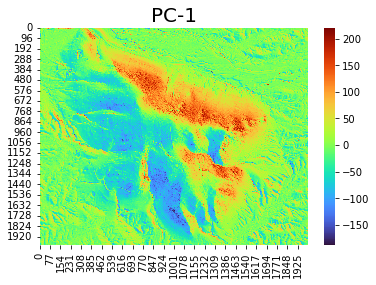

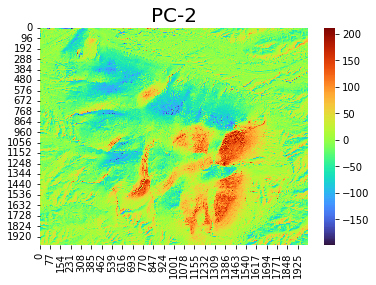

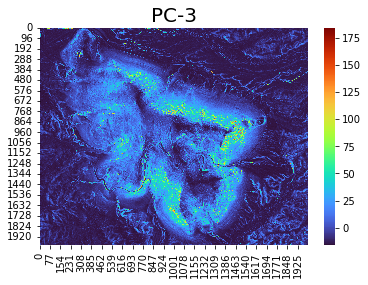

dtype is:  <class 'numpy.dtype[float64]'>
Number of unique values in PC1:  169135


In [11]:
# first import the Gtiff using rasterio and predefined get_array function
#TM_pca = get_array('/home/jmm688/Tensorflow/TM_cnn_project/workspace/GIS_data/PCA/PCA_HS.tif')   # Path laptop 
TM_pca = get_array('/home/jmm688/github/abm_detect/data/pca/PCA_HS_copy.tif')  # path desktop

# visualize all PC's with pc_plotter(array,color,pc) function
pc_plotter(TM_pca,'turbo','all') # 'all' will show each PC in TM_pca array

print('dtype is: ',type(TM_pca.dtype)) # ----------> notice how this is a numpy array float67! we want a tensor qint8 !
print('Number of unique values in PC1: ',np.unique(TM_pca[0,:,:]).shape[0])  # -------> just one band contains 169135 values! we need to preprocess and get no more than 256 (8bit) values!




To sumarize... Above we notice that our gtiff image is actually encoded in 64bit color image. This is possible due to GDAL's gtiff driver! It can write images with DN values with a range in at high precision.


Unfortunatey Tensorflow image recognition API does not support geotiff file types. This can be seen from the previous error raised from model.fit()
"cannot identify image file <_io.BytesIO object at 0x7f00ac5f64f0>"


In adition PIL software cannot write regular tiffs with non 8bit integer data types. This makes sense because most images can be perfectly described using R,G,B values ranging (0-255). Plus! camera hardware will most likely suport 8bit data.


But this isnt the case for most satelite images. In fact most images are encoded in 8, 16, 32 bits!
... which is why GDAL gtiff supports 8-64bit datatypes.

In [13]:
# Next step... we quantize the entire PCA image using the quantizer(np_array) function
TM_quantized = quantizer(TM_pca)

type(TM_quantized) # ----> tf.quantization.quantize() returns QuantizeV2 object which a tuple where...

# QuantizeV2[0].numpy() returns a numpy array of quantized tensor
# QuantizeV2[1] returns the min value
# QuantizeV2[2] returns the max value



tensorflow.python.ops.gen_array_ops.QuantizeV2

In [10]:
print(TM_quantized[1], '-----> This is min')
print(TM_quantized[2], '-----> This is max')
print()
print()
print(TM_quantized,'-----> New quantized array!!!')

tf.Tensor(-222.00638, shape=(), dtype=float32) -----> This is min
tf.Tensor(220.27196, shape=(), dtype=float32) -----> This is max


QuantizeV2(output=<tf.Tensor: shape=(3, 2000, 2000), dtype=qint8, numpy=
array([[[ 10,  11,   7, ...,   6,   7,   6],
        [  9,   7,   6, ...,   7,   7,   7],
        [ 11,   8,   6, ...,   9,  12,  10],
        ...,
        [-38, -28, -22, ...,   5,   8,  12],
        [-37, -29, -24, ...,   6,  12,  14],
        [-36, -28, -25, ...,   7,  11,  10]],

       [[  6,   2,  -3, ..., -11, -12, -13],
        [  5,   3,   1, ..., -14, -14, -13],
        [  4,   1,   2, ..., -18, -17, -17],
        ...,
        [ -8,  -1,   1, ...,   0,   9,  21],
        [ -8,  -3,  -1, ...,   4,  16,  19],
        [-11,  -5,  -2, ...,  13,  21,  16]],

       [[ -9,  -9,  -9, ...,  -8,  -7,  -7],
        [ -9,  -9,  -9, ...,  -8,  -7,  -7],
        [ -9,  -9,  -9, ...,  -7,  -7,  -7],
        ...,
        [  3,  -1,  -4, ...,  -9,  -9,  -8],
        [  3,  -1,  -3, ...,  -

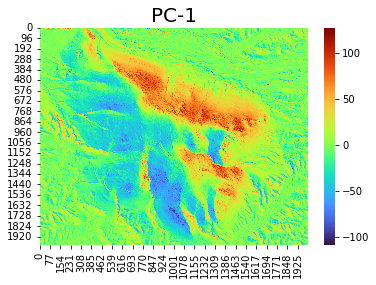

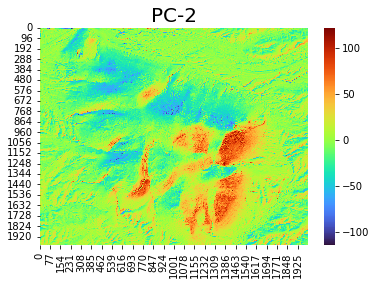

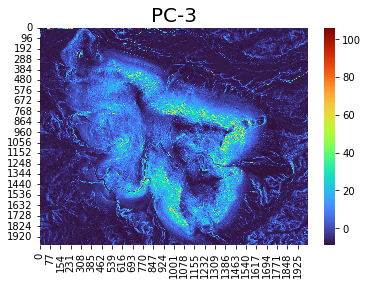

In [14]:
# lets vizualize all new PC images that have been quantized
TM_quant = TM_quantized[0].numpy()

pc_plotter(TM_quant,'turbo','all')

Text(0.5, 1.0, 'PC-3 Quantized')

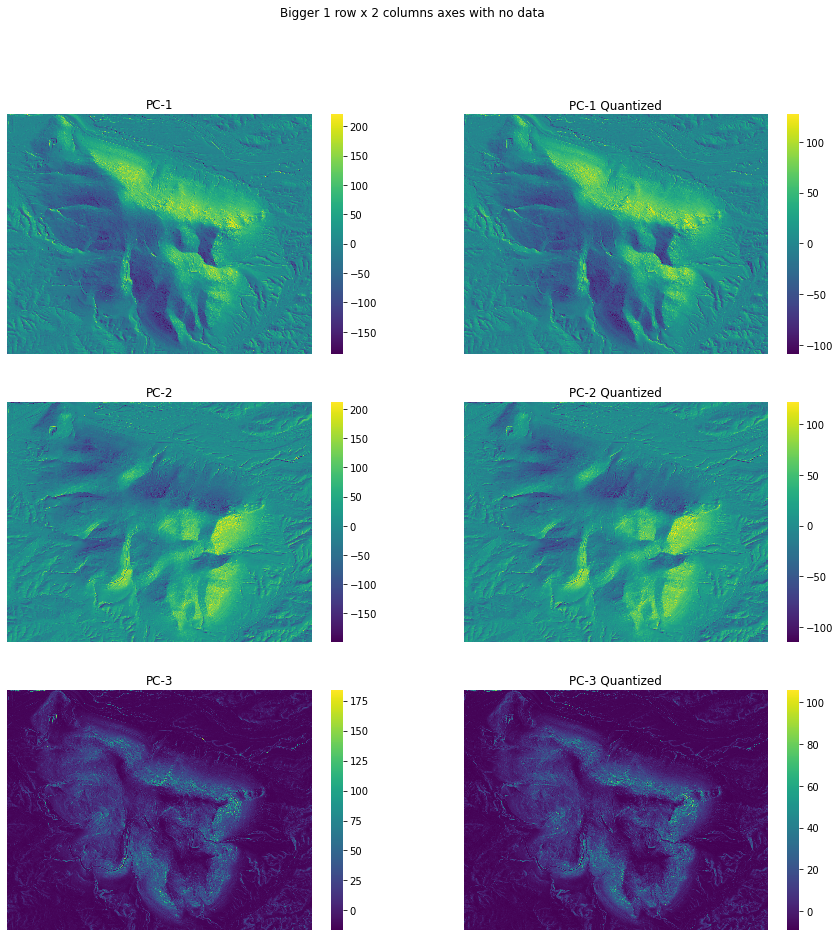

In [15]:
# lets observe the quant PC and the regular PC side by side
fig, axes = plt.subplots(3, 2, sharex=False, figsize=(15,15))
fig.suptitle('Bigger 1 row x 2 columns axes with no data')

color = 'viridis'  # -----> define color map

### PC-1
sns.heatmap(TM_pca[0,:,:], cmap=color, ax=axes[0][0],xticklabels=False,yticklabels=False)
axes[0][0].set_title('PC-1')
sns.heatmap(TM_quant[0,:,:], cmap=color, ax=axes[0][1],xticklabels=False,yticklabels=False)
axes[0][1].set_title('PC-1 Quantized')


### PC-2
sns.heatmap(TM_pca[1,:,:], cmap=color, ax=axes[1][0],xticklabels=False,yticklabels=False)
axes[1][0].set_title('PC-2')
sns.heatmap(TM_quant[1,:,:], cmap=color, ax=axes[1][1],xticklabels=False,yticklabels=False)
axes[1][1].set_title('PC-2 Quantized')


### PC-3
sns.heatmap(TM_pca[2,:,:], cmap=color, ax=axes[2][0],xticklabels=False,yticklabels=False)
axes[2][0].set_title('PC-3')
sns.heatmap(TM_quant[2,:,:], cmap=color, ax=axes[2][1],xticklabels=False,yticklabels=False)
axes[2][1].set_title('PC-3 Quantized')




Ok... we can observe from above, that although the DN scales have changed, the image itself retains its original characteristics. More importantly, it preserves the spatial charactersitcs of the pixels.

This is not observed when binning PCA derived pixels using kmeans or discretized methods 



In [10]:
# sns.heatmap(TM_quant[2,:,:], cmap=color,xticklabels=False)
# plt.savefig("output_q.png",dpi=800)

In [16]:
''' Lets compare methods at the per mine scale (50x50 meters)'''

# first lets quantize the mine_21 geotiff!
quantized_path = '/home/jmm688/Tensorflow/TM_cnn_project/workspace/fifth_try/mine_images/lidar_50x50tif_07_26_21/GIS/geotifs/PCA/mine__21.tif'
mine_arr = get_array(quantized_path)
quant = quantizer(mine_arr)[0].numpy() # [0].numpy() just for now becauswe we only want the array and not anything else!


In [17]:
# Now we load into memory the same mine but different images

transform_path = '/home/jmm688/Tensorflow/TM_cnn_project/workspace/fifth_try/mine_images/lidar_50x50tif_07_26_21/GIS/tif/train/good_tifs/mine_21.tif'
original_path = '/home/jmm688/Tensorflow/TM_cnn_project/workspace/fifth_try/mine_images/lidar_50x50tif_07_26_21/GIS/geotifs/PCA/mine__21.tif'

transform = get_array(transform_path)
original = get_array(original_path)

#pc_plotter(transform_mine_arr,'gray','all')
#pc_plotter(original_mine_arr,'gray','all')



/home/jmm688/conda/miniconda3/envs/tf/lib/python3.9/site-packages/rasterio/__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


Text(0.5, 1.0, 'PC-3 kmeans (8-bits)')

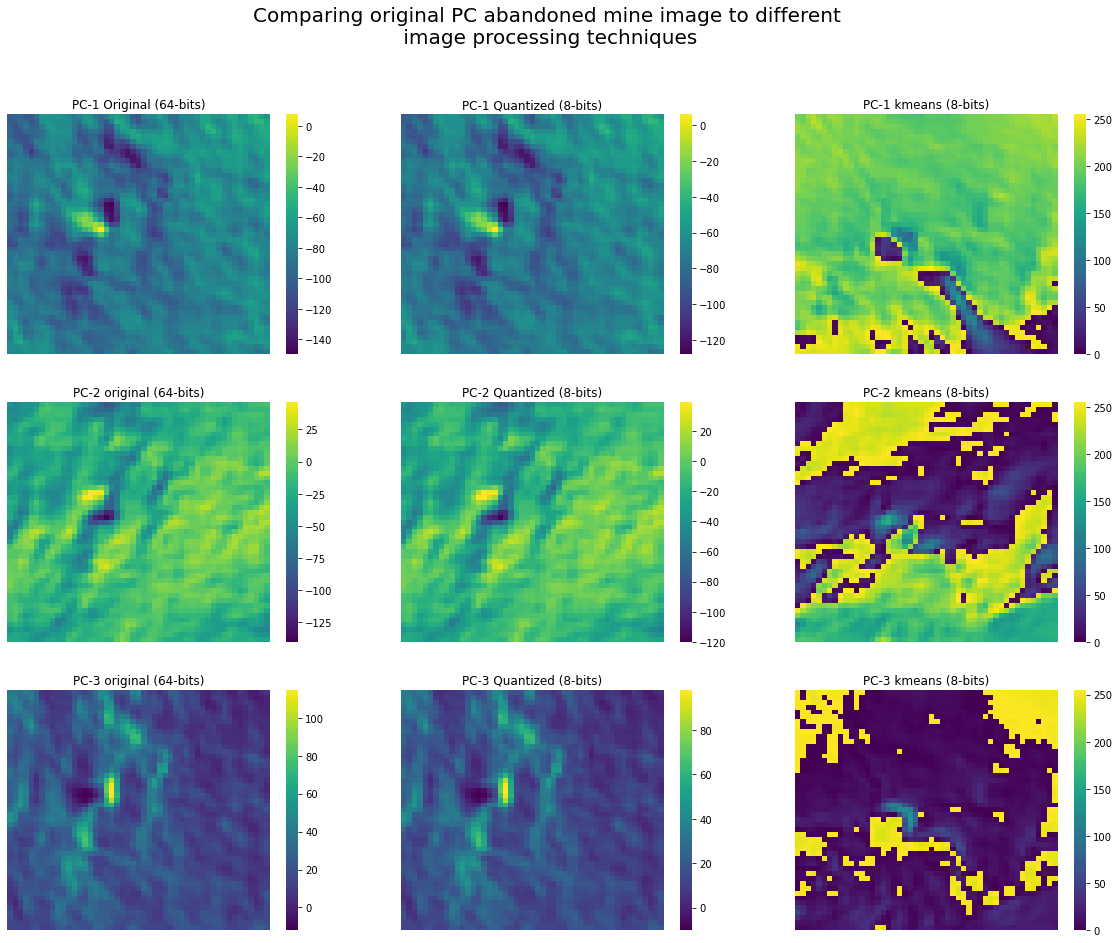

In [18]:
fig, axes = plt.subplots(3, 3, sharex=False, figsize=(20,15))
fig.suptitle('Comparing original PC abandoned mine image to different\n image processing techniques',fontsize = 20)

color = 'viridis'  # -----> define color map

### PC-1
sns.heatmap(original[0,:,:], cmap=color, ax=axes[0][0],xticklabels=False,yticklabels=False)
axes[0][0].set_title('PC-1 Original (64-bits)')
sns.heatmap(quant[0,:,:], cmap=color, ax=axes[0][1],xticklabels=False,yticklabels=False)
axes[0][1].set_title('PC-1 Quantized (8-bits)')
sns.heatmap(transform[0,:,:], cmap=color, ax=axes[0][2],xticklabels=False,yticklabels=False)
axes[0][2].set_title('PC-1 kmeans (8-bits)')


### PC-2
sns.heatmap(original[1,:,:], cmap=color, ax=axes[1][0],xticklabels=False,yticklabels=False)
axes[1][0].set_title('PC-2 original (64-bits)')
sns.heatmap(quant[1,:,:], cmap=color, ax=axes[1][1],xticklabels=False,yticklabels=False)
axes[1][1].set_title('PC-2 Quantized (8-bits)')
sns.heatmap(transform[1,:,:], cmap=color, ax=axes[1][2],xticklabels=False,yticklabels=False)
axes[1][2].set_title('PC-2 kmeans (8-bits)')


### PC-3
sns.heatmap(original[2,:,:], cmap=color, ax=axes[2][0],xticklabels=False,yticklabels=False)
axes[2][0].set_title('PC-3 original (64-bits)')
sns.heatmap(quant[2,:,:], cmap=color, ax=axes[2][1],xticklabels=False,yticklabels=False)
axes[2][1].set_title('PC-3 Quantized (8-bits)')
sns.heatmap(transform[2,:,:], cmap=color, ax=axes[2][2],xticklabels=False,yticklabels=False)
axes[2][2].set_title('PC-3 kmeans (8-bits)')

In [85]:
#pc_plotter(quant,'gray','all')

Text(0.5, 1.0, 'PC-3 kmeans (8-bits)')

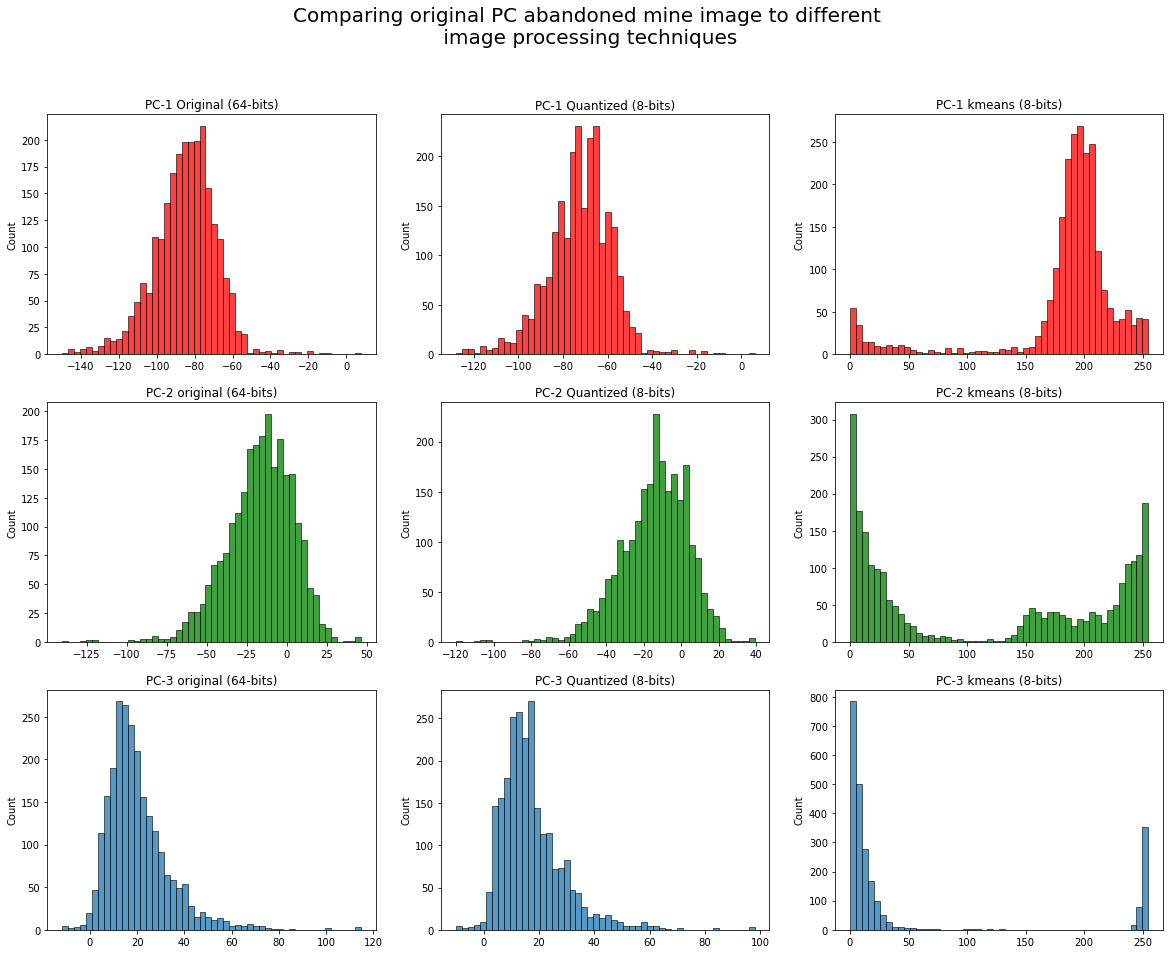

In [20]:
fig, axes = plt.subplots(3, 3, sharex=False, figsize=(20,15))
fig.suptitle('Comparing original PC abandoned mine image to different\n image processing techniques',fontsize = 20)
bins = 50


## PC-1
sns.histplot(original[0,:,:].flatten(),ax=axes[0][0],element='bars',color='r',bins=bins)
axes[0][0].set_title('PC-1 Original (64-bits)')
sns.histplot(quant[0,:,:].flatten(),ax=axes[0][1],element='bars',color='r',bins=bins)
axes[0][1].set_title('PC-1 Quantized (8-bits)')
sns.histplot(transform[0,:,:].flatten(),ax=axes[0][2],element='bars',color='r',bins=bins)
axes[0][2].set_title('PC-1 kmeans (8-bits)')


### PC-2
sns.histplot(original[1,:,:].flatten(),ax=axes[1][0],element='bars',color='g',bins=bins)
axes[1][0].set_title('PC-2 original (64-bits)')
sns.histplot(quant[1,:,:].flatten(),ax=axes[1][1],element='bars',color='g',bins=bins)
axes[1][1].set_title('PC-2 Quantized (8-bits)')
sns.histplot(transform[1,:,:].flatten(),ax=axes[1][2],element='bars',color='g',bins=bins)
axes[1][2].set_title('PC-2 kmeans (8-bits)')


### PC-3
sns.histplot(original[2,:,:].flatten(),ax=axes[2][0],element='bars',bins=bins)
axes[2][0].set_title('PC-3 original (64-bits)')
sns.histplot(quant[2,:,:].flatten(),ax=axes[2][1],element='bars',bins=bins)
axes[2][1].set_title('PC-3 Quantized (8-bits)')
sns.histplot(transform[2,:,:].flatten(),ax=axes[2][2],element='bars',bins=bins)
axes[2][2].set_title('PC-3 kmeans (8-bits)')

Text(0.5, 1.0, 'PC-3 kmeans (8-bits)')

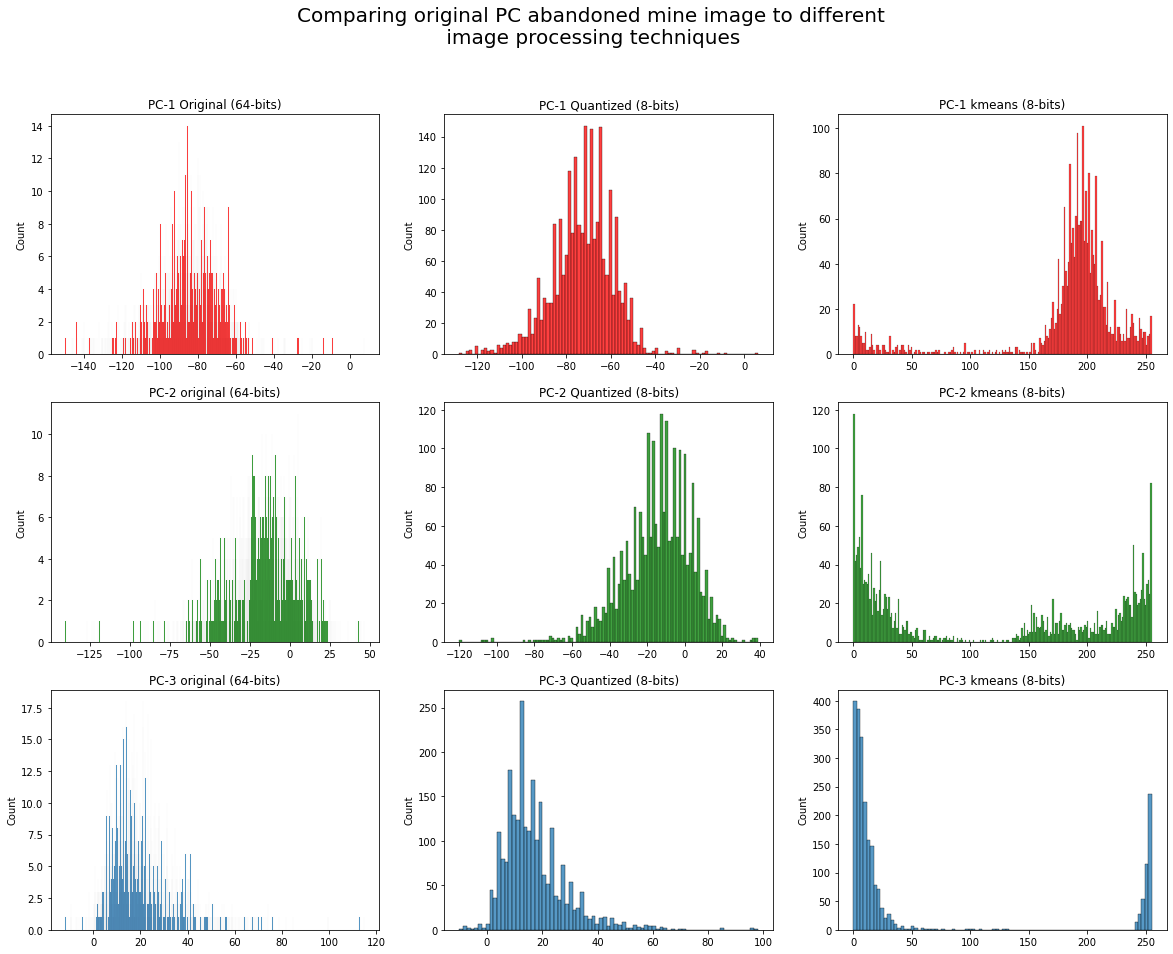

In [21]:
fig, axes = plt.subplots(3, 3, sharex=False, figsize=(20,15))
fig.suptitle('Comparing original PC abandoned mine image to different\n image processing techniques',fontsize = 20)
bins = 90


## PC-1
sns.histplot(original[0,:,:].flatten(),ax=axes[0][0],element='bars',color='r',bins=np.unique(original[0,:,:]).shape[0])
axes[0][0].set_title('PC-1 Original (64-bits)')
sns.histplot(quant[0,:,:].flatten(),ax=axes[0][1],element='bars',color='r',bins=np.unique(quant[0,:,:]).shape[0])
axes[0][1].set_title('PC-1 Quantized (8-bits)')
sns.histplot(transform[0,:,:].flatten(),ax=axes[0][2],element='bars',color='r',bins=np.unique(transform[0,:,:]).shape[0])
axes[0][2].set_title('PC-1 kmeans (8-bits)')


### PC-2
sns.histplot(original[1,:,:].flatten(),ax=axes[1][0],element='bars',color='g',bins=np.unique(original[1,:,:]).shape[0])
axes[1][0].set_title('PC-2 original (64-bits)')
sns.histplot(quant[1,:,:].flatten(),ax=axes[1][1],element='bars',color='g',bins=np.unique(quant[1,:,:]).shape[0])
axes[1][1].set_title('PC-2 Quantized (8-bits)')
sns.histplot(transform[1,:,:].flatten(),ax=axes[1][2],element='bars',color='g',bins=np.unique(transform[1,:,:]).shape[0])
axes[1][2].set_title('PC-2 kmeans (8-bits)')


### PC-3
sns.histplot(original[2,:,:].flatten(),ax=axes[2][0],element='bars',bins=np.unique(original[2,:,:]).shape[0])
axes[2][0].set_title('PC-3 original (64-bits)')
sns.histplot(quant[2,:,:].flatten(),ax=axes[2][1],element='bars',bins=np.unique(quant[2,:,:]).shape[0])
axes[2][1].set_title('PC-3 Quantized (8-bits)')
sns.histplot(transform[2,:,:].flatten(),ax=axes[2][2],element='bars',bins=np.unique(transform[2,:,:]).shape[0])
axes[2][2].set_title('PC-3 kmeans (8-bits)')

Text(0.5, 1.0, 'PC-3 Quantized (8-bits)')

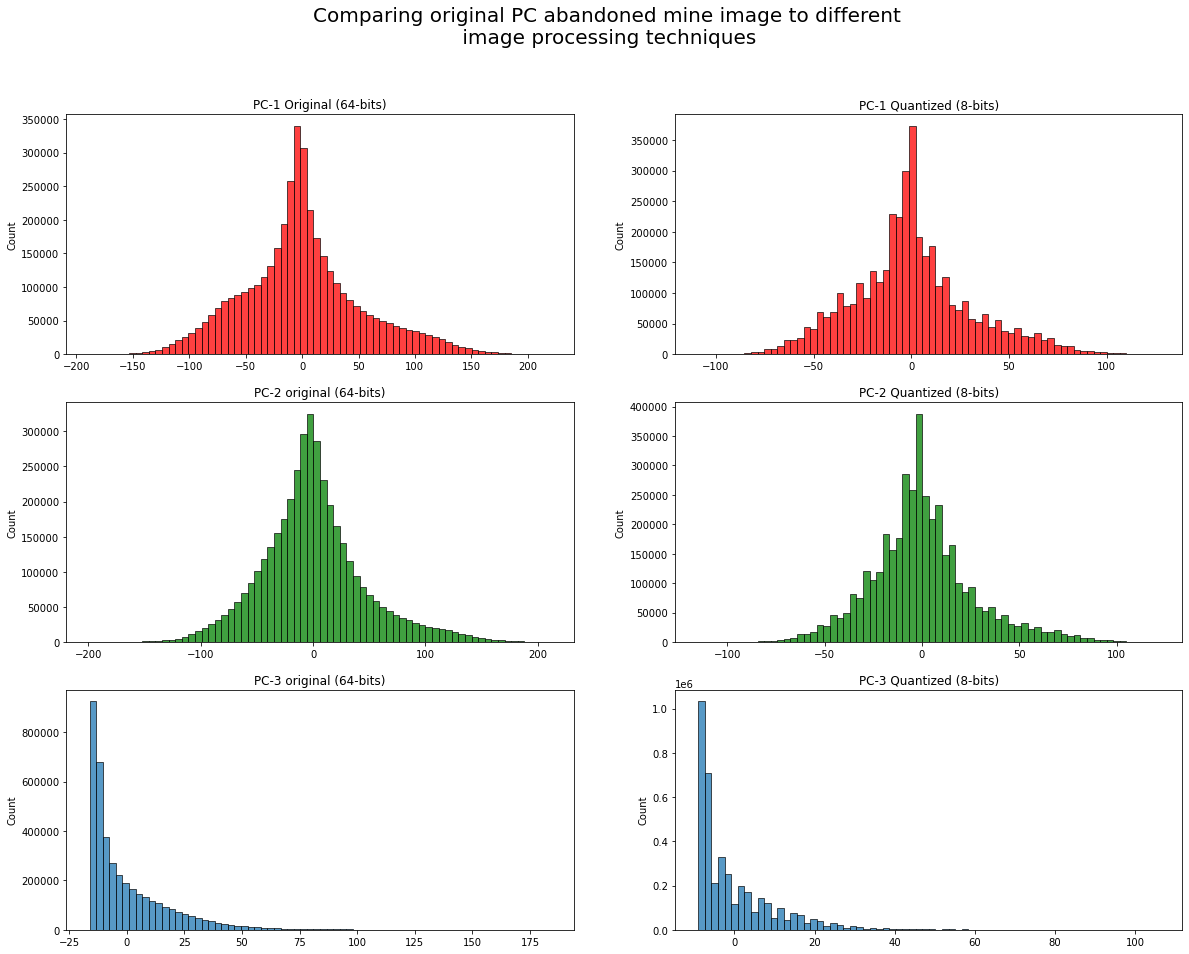

In [22]:
fig, axes = plt.subplots(3, 2, sharex=False, figsize=(20,15))
fig.suptitle('Comparing original PC abandoned mine image to different\n image processing techniques',fontsize = 20)
bins = 70


## PC-1
sns.histplot(TM_pca[0,:,:].flatten(),ax=axes[0][0],element='bars',color='r',bins=bins)
axes[0][0].set_title('PC-1 Original (64-bits)')
sns.histplot(TM_quant[0,:,:].flatten(),ax=axes[0][1],element='bars',color='r',bins=bins)
axes[0][1].set_title('PC-1 Quantized (8-bits)')
#sns.histplot(transform[0,:,:].flatten(),ax=axes[0][2],element='bars',color='r',bins=bins)
#axes[0][2].set_title('PC-1 kmeans (8-bits)')


### PC-2
sns.histplot(TM_pca[1,:,:].flatten(),ax=axes[1][0],element='bars',color='g',bins=bins)
axes[1][0].set_title('PC-2 original (64-bits)')
sns.histplot(TM_quant[1,:,:].flatten(),ax=axes[1][1],element='bars',color='g',bins=bins)
axes[1][1].set_title('PC-2 Quantized (8-bits)')
#sns.histplot(transform[1,:,:].flatten(),ax=axes[1][2],element='bars',color='g',bins=bins)
#axes[1][2].set_title('PC-2 kmeans (8-bits)')


### PC-3
sns.histplot(TM_pca[2,:,:].flatten(),ax=axes[2][0],element='bars',bins=bins)
axes[2][0].set_title('PC-3 original (64-bits)')
sns.histplot(TM_quant[2,:,:].flatten(),ax=axes[2][1],element='bars',bins=bins)
axes[2][1].set_title('PC-3 Quantized (8-bits)')
#sns.histplot(transform[2,:,:].flatten(),ax=axes[2][2],element='bars',bins=bins)
#axes[2][2].set_title('PC-3 kmeans (8-bits)')

In [26]:
os.path.isdir(path)

False

# Converting all geotifs into quantized tifs to run a new model! 

Now that we can quantize gtifs to fit in an 8bit archetecture, we now have to convert all tifs to re run the model.


1.

First we will



2.

Then we will

In [28]:
### Step one
# lets first make sure we are in the right directory.
os.getcwd()
#path = '/home/jose/Documents/Thesis/modeling/tensorflow/fifth_try/mine_images/lidar_50x50tif_07_26_21/GIS/geotifs/PCA'
path = '/home/jmm688/Tensorflow/TM_cnn_project/workspace/fifth_try/mine_images/lidar_50x50tif_07_26_21/GIS/geotifs/PCA'
os.chdir(path)
print(os.listdir())  # should be a list of gtifs if the directory is correct.
print()
print()

# Here we check if a folder exists with the name quant_tifs which will hold new quantized tifs if not it will make a new one
if 'quant_folder' in os.listdir(path):
    print('THE FOLDER EXISTS!!!')
    
else:
    print('FOLDER DOES NOT EXIST!!! making one :)')
    os.mkdir('quant_folder')






['mine__15.tif', 'mine__3.tif', 'mine__19.tif', 'mine__13.tif', 'mine__20.tif.aux.xml', 'mine__25.tif.aux.xml', 'mine__1.tif.aux.xml', 'mine__22.tif.aux.xml', 'mine__21.tif', 'mine__7.tif', 'mine__5.tif.aux.xml', 'mine__9.tif', 'mine__6.tif', 'mine__30.tif.aux.xml', 'mine__30.tif', 'mine__0.tif', 'mine__33.tif.aux.xml', 'mine__14.tif', 'mine__24.tif', 'mine__26.tif.aux.xml', 'mine__31.tif.aux.xml', 'quant_folder', 'mine__15.tif.aux.xml', 'mine__35.tif.aux.xml', 'mine__31.tif', 'mine__12.tif.aux.xml', 'mine__21.tif.aux.xml', 'mine__2.tif.aux.xml', 'mine__27.tif.aux.xml', 'mine__7.tif.aux.xml', 'mine__16.tif', 'mine__26.tif', '.ipynb_checkpoints', 'mine__4.tif', 'mine__38.tif', 'mine__36.tif', 'mine__37.tif', 'mine__9.tif.aux.xml', 'mine__37.tif.aux.xml', 'mine__22.tif', 'mine__11.tif.aux.xml', 'mine__17.tif.aux.xml', 'mine__36.tif.aux.xml', 'mine__14.tif.aux.xml', 'mine__38.tif.aux.xml', 'mine__8.tif.aux.xml', 'mine__10.tif.aux.xml', 'mine__0.tif.aux.xml', 'mine__28.tif.aux.xml', 'mine_

In [29]:
# Now lets make a forloop with an if and else to make sure we extract the right files (.tif and not .tif.aux.xml)

list_of_good_tifs = [] # empty list that will contain the files we need just to show whats going on

for i in os.listdir(path):
    
    file = i.split('.')  # this will split i(the file in directory 'path') and make a list of strings based on the '.'
    #print(file)  # here the file length will either be 2 or 4, mine.tif(2) and mine.tif.aux.xml(4) respectively.
    
    if len(file) == 2 and file[1] == 'tif':  # boolean MUST be file length2 AND must be a .tif (so no .csv, .las, etc!)
        list_of_good_tifs.append(i)  # Notice how variable i(a single string) is being appended and not variable file(this is a list of strings)
 
print(list_of_good_tifs) # no weird files!!!


['mine__15.tif', 'mine__3.tif', 'mine__19.tif', 'mine__13.tif', 'mine__21.tif', 'mine__7.tif', 'mine__9.tif', 'mine__6.tif', 'mine__30.tif', 'mine__0.tif', 'mine__14.tif', 'mine__24.tif', 'mine__31.tif', 'mine__16.tif', 'mine__26.tif', 'mine__4.tif', 'mine__38.tif', 'mine__36.tif', 'mine__37.tif', 'mine__22.tif', 'mine__10.tif', 'mine__8.tif', 'mine__29.tif', 'mine__33.tif', 'mine__18.tif', 'mine__12.tif', 'mine__28.tif', 'mine__11.tif', 'mine__1.tif', 'mine__5.tif', 'mine__20.tif', 'mine__32.tif', 'mine__17.tif', 'mine__35.tif', 'mine__34.tif', 'mine__2.tif', 'mine__23.tif', 'mine__25.tif', 'mine__27.tif']


OK! lets automate this for train, test directories of mine and not_mine files

In [30]:
# purpose is to shift quantized array by + abs(array.min()) to fit within 0 to 255 range without python sillyness
def mapbit8_uint8(array):
    arr = array.astype(np.int16)
    #print(array.shape)
    #arr = array
    export = np.zeros(arr.shape)
    
    
    for i in range(0,arr.shape[-1]):
        
        minimum = int(abs(arr[:,:,i].min()))
        maximum = int(abs(arr[:,:,i].max()))
        print(int(arr[:,:,i].min()) + minimum)
        print(int(arr[:,:,i].max()) + maximum)
        print()
        export[:,:,i] = arr[:,:,i] + minimum
    
    return export.astype(np.uint8)

    
#test = quantizer(get_array(path+'/'+'mine__1.tif'))

#test_1 = test[0].numpy()
#ha = int8_2_uint8(test_1)
#TMmap = map_int8_2_uint8(TM_quant)
#pc_plotter(TMmap,'turbo','all')

#quant_im = np.moveaxis(TM_quant,0,-1)
#img = mapbit8_uint8(quant_im)
#im = Image.fromarray(img)
#Image.fromarray(img).save('/home/jmm688/github/abm_detect/result.tif')
#im.save('/home/jmm688/github/abm_detect/' + 'pcaquantpng' , format='png',bits=np.uint16)
#quant_im.shape




In [31]:
### Execute map quantization and transformation from int to uint

quant_im = np.moveaxis(TM_quant,0,-1)
img = mapbit8_uint8(quant_im)
#im = Image.fromarray(img)
Image.fromarray(img).save('/home/jmm688/github/abm_detect/result2.tif')
#im.save('/home/jmm688/github/abm_detect/' + 'pcaquantpng' , format='png',bits=np.uint16)
#quant_im.shape

0
254

0
244

0
212



In [32]:
# purpose is to shift quantized array by + abs(array.min()) to fit within 0 to 255 range without python sillyness
def minebit8_uint8(array):
    arr = array.astype(np.int16)
    #print(array.shape)
    #arr = array
    export = np.zeros(arr.shape)
    
    
    for i in range(0,arr.shape[-1]):
        
        minimum = int(abs(arr[:,:,i].min()))
        maximum = int(abs(arr[:,:,i].max()))
        #print(int(arr[:,:,i].min()) + minimum)
        #print(int(arr[:,:,i].max()) + maximum)
        #print()
        export[:,:,i] = arr[:,:,i] + minimum
    
    
    
    return export.astype(np.uint8)


    
#test = quantizer(get_array(path+'/'+'mine__1.tif'))

#test_1 = test[0].numpy()
#ha = int8_2_uint8(test_1)
#TMmap = int8_2_uint8(TM_quant)
#pc_plotter(TMmap,'gray','all')


#quant_im = np.moveaxis(TM_quant,0,-1)
#pc_plotter(quant_arr,'gray',3)

#img = int8_2_uint8(quant_im)
#im = Image.fromarray(img)

#im.save(destination_train + gtif, format='tiff')






Text(0.5, 1.0, 'Transformed PC-2 (8-bits)')

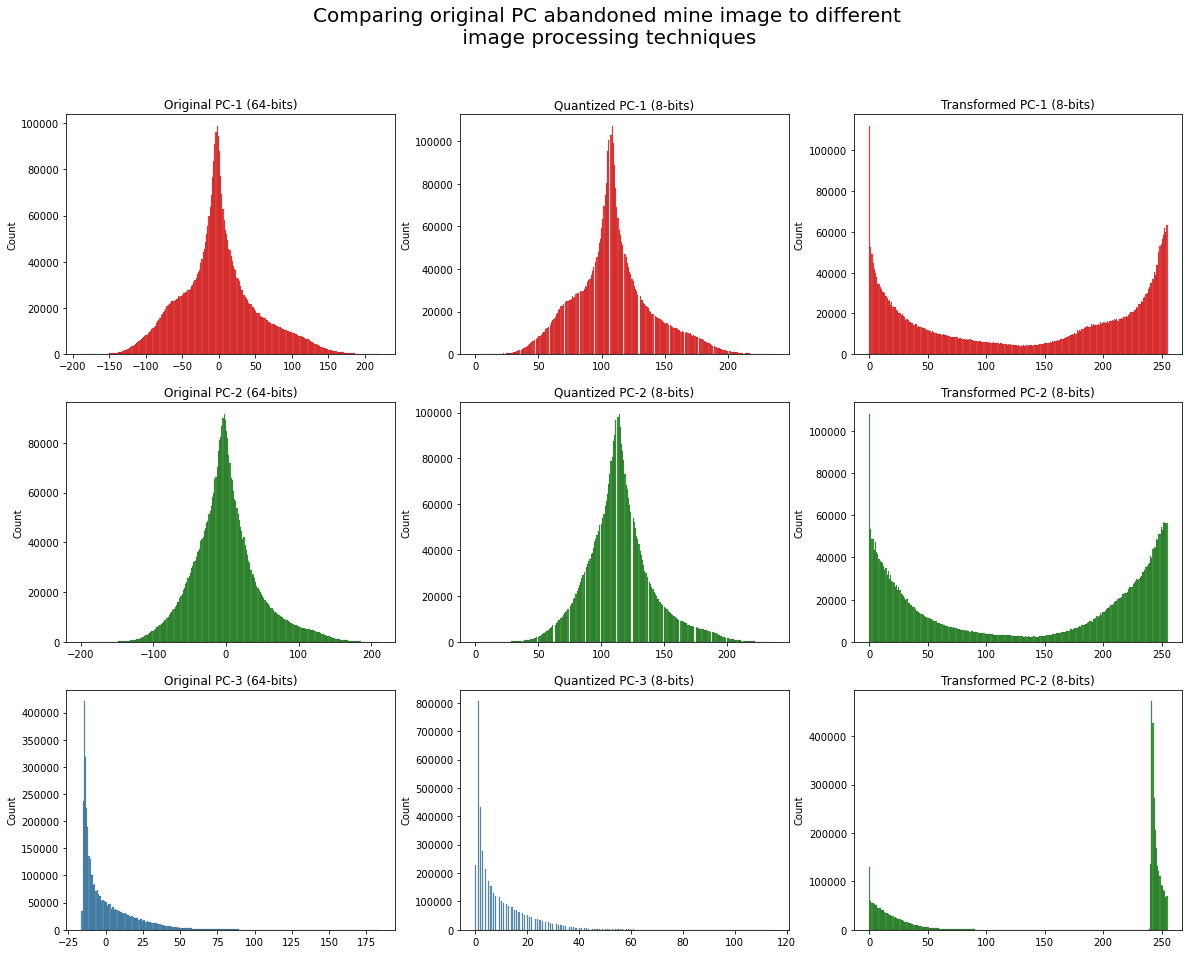

In [34]:
fig, axes = plt.subplots(3, 3, sharex=False, figsize=(20,15))
fig.suptitle('Comparing original PC abandoned mine image to different\n image processing techniques',fontsize = 20)
bins = 256


## PC-1
sns.histplot(TM_pca[0,:,:].flatten(),ax=axes[0][0],element='bars',color='r',bins=bins)
axes[0][0].set_title('Original PC-1 (64-bits)')
sns.histplot(img[:,:,0].flatten(),ax=axes[0][1],element='bars',color='r',bins=bins)
axes[0][1].set_title('Quantized PC-1 (8-bits)')
sns.histplot(TM_pca.astype(np.uint8)[0,:,:].astype(np.uint8).flatten(),ax=axes[0][2],element='bars',color='r',bins=bins)
axes[0][2].set_title('Transformed PC-1 (8-bits)')


### PC-2
sns.histplot(TM_pca[1,:,:].flatten(),ax=axes[1][0],element='bars',color='g',bins=bins)
axes[1][0].set_title('Original PC-2 (64-bits)')
sns.histplot(img[:,:,1].flatten(),ax=axes[1][1],element='bars',color='g',bins=bins)
axes[1][1].set_title('Quantized PC-2 (8-bits)')
sns.histplot(TM_pca.astype(np.uint8)[1,:,:].astype(np.uint8).flatten(),ax=axes[1][2],element='bars',color='g',bins=bins)
axes[1][2].set_title('Transformed PC-2 (8-bits)')


### PC-3
sns.histplot(TM_pca[2,:,:].flatten(),ax=axes[2][0],element='bars',bins=bins)
axes[2][0].set_title('Original PC-3 (64-bits)')
sns.histplot(img[:,:,2].flatten(),ax=axes[2][1],element='bars',bins=bins)
axes[2][1].set_title('Quantized PC-3 (8-bits)')
sns.histplot(TM_pca.astype(np.uint8)[2,:,:].astype(np.uint8).flatten(),ax=axes[2][2],element='bars',color='g',bins=bins)
axes[2][2].set_title('Transformed PC-2 (8-bits)')








In [35]:
result = get_array('/home/jmm688/github/abm_detect/result.tif')



/home/jmm688/conda/miniconda3/envs/tf/lib/python3.9/site-packages/rasterio/__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [36]:
#im.save('/home/jmm688/github/abm_detect/data/pca' + 'quantif_transformed', format='tiff')


results = np.moveaxis(result,0,-1)


Text(0.5, 1.0, 'PC-3 kmeans (8-bits)')

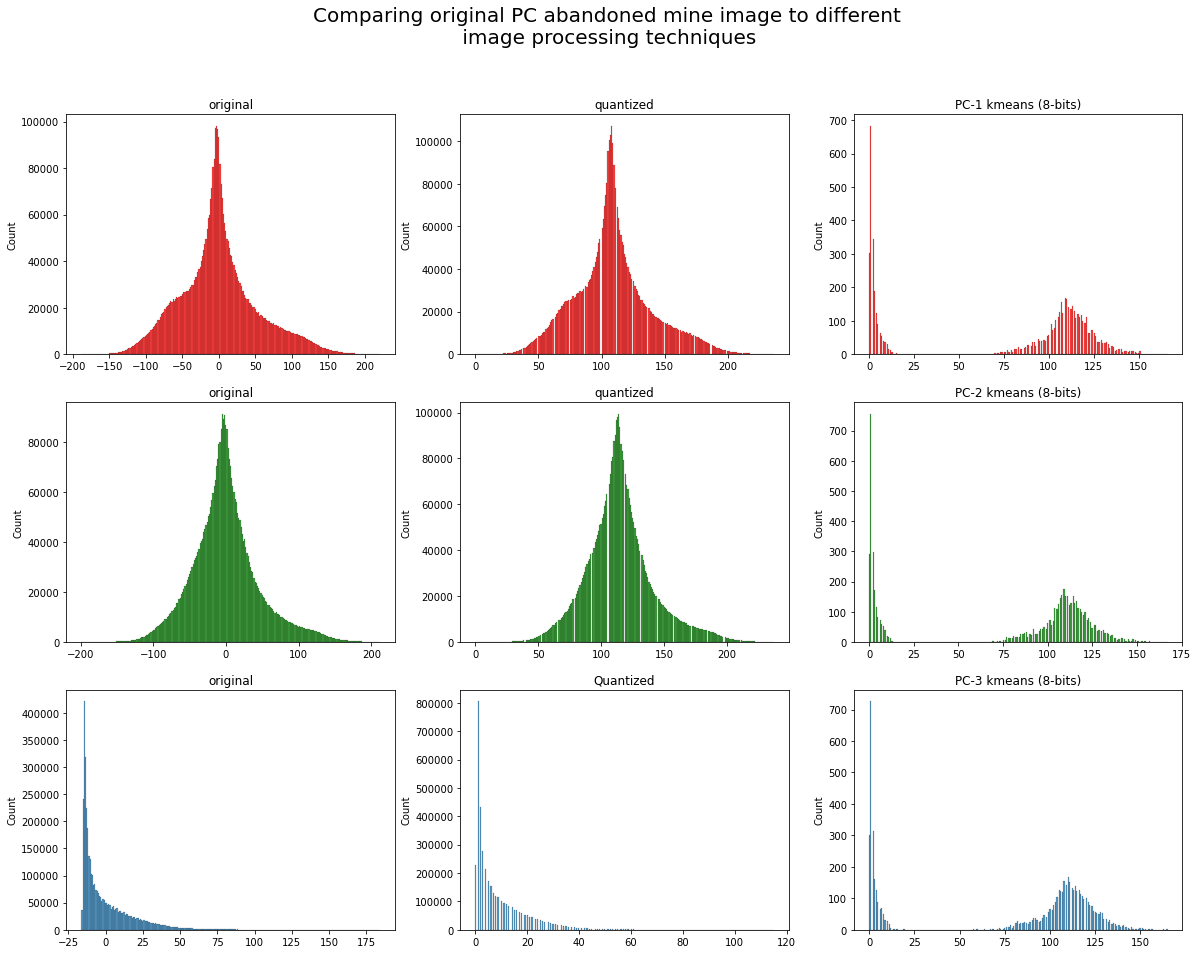

In [37]:

fig, axes = plt.subplots(3, 3, sharex=False, figsize=(20,15))
fig.suptitle('Comparing original PC abandoned mine image to different\n image processing techniques',fontsize = 20)
bins = 255


## PC-1
sns.histplot(TM_pca[0,:,:].flatten(),ax=axes[0][0],element='bars',color='r',bins=bins)
axes[0][0].set_title('original')
sns.histplot(img[:,:,0].flatten(),ax=axes[0][1],element='bars',color='r',bins=bins)
axes[0][1].set_title('quantized')
sns.histplot(result[:,:,0].flatten(),ax=axes[0][2],element='bars',color='r',bins=bins)
axes[0][2].set_title('PC-1 kmeans (8-bits)')


### PC-2
sns.histplot(TM_pca[1,:,:].flatten(),ax=axes[1][0],element='bars',color='g',bins=bins)
axes[1][0].set_title('original')
sns.histplot(img[:,:,1].flatten(),ax=axes[1][1],element='bars',color='g',bins=bins)
axes[1][1].set_title('quantized')
sns.histplot(result[:,:,1].flatten(),ax=axes[1][2],element='bars',color='g',bins=bins)
axes[1][2].set_title('PC-2 kmeans (8-bits)')


### PC-3
sns.histplot(TM_pca[2,:,:].flatten(),ax=axes[2][0],element='bars',bins=bins)
axes[2][0].set_title('original')
sns.histplot(img[:,:,2].flatten(),ax=axes[2][1],element='bars',bins=bins)
axes[2][1].set_title('Quantized')
sns.histplot(result[:,:,2].flatten(),ax=axes[2][2],element='bars',bins=bins)
axes[2][2].set_title('PC-3 kmeans (8-bits)')

In [38]:
# first define all paths where gtif folders exist

# LAPTOP PATH
#mine_path = '/home/jose/Documents/Thesis/modeling/tensorflow/fifth_try/mine_images/lidar_50x50tif_07_26_21/GIS/geotifs/PCA'
#not_mine_path = '/home/jose/Documents/Thesis/modeling/tensorflow/fifth_try/not_mine_images/partition_1/GIS/geotifs/PCA'


# DESKTOP PATH
mine_path = '/home/jmm688/Tensorflow/TM_cnn_project/workspace/fifth_try/mine_images/lidar_50x50tif_07_26_21/GIS/geotifs/PCA'
not_mine_path = '/home/jmm688/Tensorflow/TM_cnn_project/workspace/fifth_try/not_mine_images/partition_1/GIS/geotifs/PCA'


list_paths = [mine_path,not_mine_path]  # list of paths

# now we write a function that will take a a list of files in directory and parse out the files we want

def dir_gtif2quantif(path):
    #print(path)
    
    list_tifs = [] # empty list that will contain a list of good mine.tif's
    
    for i in os.listdir(path):
        file = i.split('.')  # this will split i(the file in directory 'path') and make a list of strings based on the '.'
        #print(file)  # here the file length will either be 2 or 4, mine.tif(2) and mine.tif.aux.xml(4) respectively.
    
        if len(file) == 2 and file[1] == 'tif':  # boolean MUST be file length2 AND must be a .tif (so no .csv, .las, etc!)
            list_tifs.append(i)
    
    #print(int(len(list_tifs) * .8 // 1))
    # defining a threshold index used to define train and test variables with file path strings
    threshold = int(len(list_tifs) * .8 // 1) # this will be the index to split the list of tifs //1 is to make sure its an integer and not a float
    train = list_tifs[:threshold]
    test = list_tifs[threshold:]
    
    folder_list = [train,test]  # make a list to then itereate over both variables
    
    
    
    count = 0 # will be used to define if in train or test variable(train==0 and test==1)
    #destination_train = '/home/jose/Downloads/butt/'  # laptop
    destination_train = '/home/jmm688/Downloads/butt/' # desktop
    
    for i in folder_list:  # will be either test or train
        parent_dir = path + '/'  # helps with reading and writing files
        
        for gtif in i:  # will be all tifs in train or test splitted lists
            #### if count == 0
            if count == 0:  # if 0(train)
               
                file_path = parent_dir + gtif # merging paths to check
                if os.path.isfile(file_path): # if the file path exists, enter the next code block
                    np_arr = get_array(file_path) # using previous functions to get the array from a gtif USE pc_plotter to check!
                    quant = quantizer(np_arr) # passing the numpy array to the quantizer function to get a quantized array
                    quant_arr = quant[0].numpy() # the quantized array :)!!
                    
                    # Now we write the new quantized array to a regular tif and write it to a folder in a directory
                    quant_im = np.moveaxis(quant_arr,0,-1)
                    img = minebit8_uint8(quant_im) # using predifiend function to transform into uint8 for a tiff            
                    
                    
                    if path == mine_path: # checking where to send the image
                        dest = '/home/jmm688/Tensorflow/TM_cnn_project/model/training/mine/' + gtif
                    else:
                        dest = '/home/jmm688/Tensorflow/TM_cnn_project/model/training/not_mine/' + gtif
                    
                    
                    Image.fromarray(img).save(dest) #saving the per mine file
                  
                    
                    
                else:  # if the file path does not exist it will break out of the loop and print(file_path) is not a file
                    print(file_path)
                    print('is not a file')
                    break # exiting for loop
                    
                    
                    
            #### if count == 1       
            else: # if it is count = 1(test)
                
                file_path = parent_dir + gtif
                if os.path.isfile(file_path): # if the file path exists, enter the next code block
                    np_arr = get_array(file_path) # using previous functions to get the array from a gtif USE pc_plotter to check!
                    quant = quantizer(np_arr) # passing the numpy array to the quantizer function to get a quantized array
                    quant_arr = quant[0].numpy() # the quantized array :)!!
                    
                    # Now we write the new quantized array to a regular tif and write it to a folder in a directory
                    quant_im = np.moveaxis(quant_arr,0,-1)
                    img = minebit8_uint8(quant_im) # using predefined function to transform into uint8 for a tiff

                    
                    if path == mine_path:
                        dest = '/home/jmm688/Tensorflow/TM_cnn_project/model/testing/mine/' + gtif
                    else:
                        dest = '/home/jmm688/Tensorflow/TM_cnn_project/model/testing/not_mine/' + gtif
                    

                    Image.fromarray(img).save(dest)

                    
                    
                
        count+=1
            
    
    
    
    
    
        
    

dir_gtif2quantif(mine_path)   
    
    
#for i in list_paths:
 #   if os.path.isdir(i):
  #      print('fdsa')


In [5]:
# cd into project directory
proj_path = '/home/jmm688/Tensorflow/TM_cnn_project/model_'   # ---------------> Define path please!!!
os.chdir(proj_path)
train_dir = proj_path + '/training'
test_dir = proj_path + '/testing'



# loading in dir paths for training and testing folders within project
folders_in = os.listdir()

training_mine_dir = train_dir + '/' + 'mine'    # dir training class = 1
training_notmine_dir = train_dir + '/' + 'not_mine'   # dir training class = 0

testing_mine_dir = test_dir + '/' + 'mine'      # dir testing class = 1
testing_notmine_dir = test_dir + '/' + 'not_mine'     # dir testing class = 0


# checking if final paths actually exist
if not os.path.isdir(training_mine_dir):
    print(training_mine_dir,'   --------- > is not a directory!!!')
    
elif not os.path.isdir(training_notmine_dir):
    print(training_notmine_dir,'   --------- > is not a directory!!!')

elif not os.path.isdir(testing_mine_dir):
    print(testing_mine_dir,'   --------- > is not a directory!!!')

elif not os.path.isdir(testing_notmine_dir):
    print(testing_notmine_dir,'   --------- > is not a directory!!!')
    
    

In [6]:
# defining training and testing ImageDataGenerators
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator( horizontal_flip=True,
                                    vertical_flip=True,
                                    rotation_range=10
                                                       )

test_datagen = ImageDataGenerator( horizontal_flip=True,
                                   vertical_flip=True,
                                   rotation_range=10
                                                       )


# defining training and testing generators from ImageDataGenerator objects
train_generator = train_datagen.flow_from_directory( train_dir,
                                                     batch_size = 4,
                                                     class_mode = 'binary',
                                                     #color_mode = 'grayscale',
                                                     target_size = (50,50), 
                                                                           )

test_generator = test_datagen.flow_from_directory( test_dir,
                                                   batch_size = 4,
                                                   class_mode = 'binary',
                                                   #color_mode = 'grayscale',
                                                   target_size = (50,50),
                                                                           ) 

Found 45 images belonging to 2 classes.
Found 21 images belonging to 2 classes.


In [ ]:
# writing CNN architecture

model = tf.keras.models.Sequential([
        # first layer
        tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (50,50,3)),  # 1st Convolution
        tf.keras.layers.MaxPooling2D(2,2),  # 1st Max Pooling
    
        # second layer
        tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),  # 2nd Convolution 
        tf.keras.layers.MaxPooling2D(2,2),  # 2nd Max Pooling
    
        # third layer
        tf.keras.layers.Conv2D(128, (2,2), activation = 'relu'),  # 3rd Convolution
        tf.keras.layers.MaxPooling2D(2,2),  # 3rd Max Pooling
    
        # flat
        tf.keras.layers.Flatten(),
        
        # Dense
        tf.keras.layers.Dense(512,activation='relu'),
        tf.keras.layers.Dense(1,activation='sigmoid')
    
])


# compiling the model
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate = 0.001), loss='binary_crossentropy', metrics=['acc'])



# The loss function that will be used = binary cross entropy
LOSS = 'binary_cross_entropy'
model.summary()


#from PIL import Image
import scipy
history = model.fit_generator(train_generator,
                            validation_data = test_generator,
                            #steps_per_epoch = 10,
                            epochs = 250,
                            #validation_steps = 50,
                            #callbacks = [callbacks],
                            verbose = 2)# Your Code Here (set e

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 48, 48, 64)        1792      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 128)       65664     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3200)             

12/12 - 0s - loss: 2.9565e-09 - acc: 1.0000 - val_loss: 2.1223 - val_acc: 0.7619
Epoch 75/250
12/12 - 0s - loss: 4.5595e-09 - acc: 1.0000 - val_loss: 1.1244 - val_acc: 0.8095
Epoch 76/250
12/12 - 0s - loss: 2.2211e-09 - acc: 1.0000 - val_loss: 1.8154 - val_acc: 0.9048
Epoch 77/250
12/12 - 0s - loss: 8.4217e-10 - acc: 1.0000 - val_loss: 1.7867 - val_acc: 0.9048
Epoch 78/250
12/12 - 0s - loss: 4.8008e-10 - acc: 1.0000 - val_loss: 2.3417 - val_acc: 0.8095
Epoch 79/250
12/12 - 0s - loss: 3.1037e-10 - acc: 1.0000 - val_loss: 2.0042 - val_acc: 0.8095
Epoch 80/250
12/12 - 0s - loss: 6.2509e-06 - acc: 1.0000 - val_loss: 15.9757 - val_acc: 0.7619
Epoch 81/250
12/12 - 0s - loss: 10.1017 - acc: 0.8889 - val_loss: 0.9805 - val_acc: 0.9524
Epoch 82/250
12/12 - 0s - loss: 0.0786 - acc: 0.9778 - val_loss: 0.8516 - val_acc: 0.8571
Epoch 83/250
12/12 - 0s - loss: 1.3909e-04 - acc: 1.0000 - val_loss: 1.5096 - val_acc: 0.8571
Epoch 84/250
12/12 - 0s - loss: 3.5562e-06 - acc: 1.0000 - val_loss: 1.5363 - v

0.8266666769981384

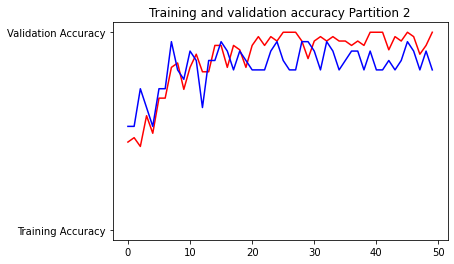

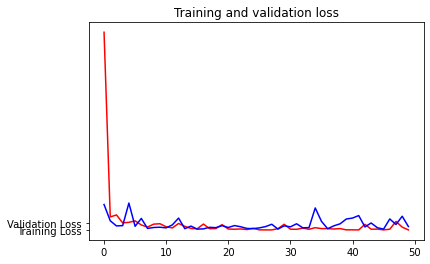

In [10]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

hist = history
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=hist.history['acc']
val_acc=hist.history['val_acc']
loss=hist.history['loss']
val_loss=hist.history['val_loss']

epochs=range(len(acc) - 0) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc[0:], 'r', "Training Accuracy")
plt.plot(epochs, val_acc[0:], 'b', "Validation Accuracy")
plt.title('Training and validation accuracy Partition 2')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss[0:], 'r', "Training Loss")
plt.plot(epochs, val_loss[0:], 'b', "Validation Loss")


plt.title('Training and validation loss')


######## THE GOOD ONE !!!!!!!!!!!!

sum(val_acc)/50
